# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

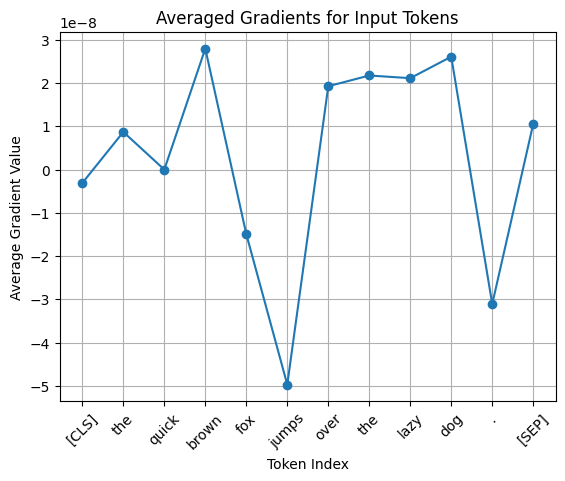

In [9]:
#!pip install transformers

import torch
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer

model_name = "bert-base-uncased"
model = AutoModel.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

inputs = tokenizer("The quick brown fox jumps over the lazy dog.", return_tensors="pt")

embeddings = model.embeddings.word_embeddings(inputs['input_ids'])
embeddings.retain_grad()

outputs = model(inputs_embeds=embeddings)

loss = outputs.last_hidden_state.sum()
loss.backward()  

gradients = embeddings.grad
average_gradients = gradients[0].mean(dim=1).detach().numpy()

plt.plot(average_gradients, marker='o')
plt.title("Averaged Gradients for Input Tokens")
plt.xlabel("Token Index")
plt.ylabel("Average Gradient Value")
plt.xticks(ticks=range(len(average_gradients)), labels=tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]), rotation=45)
plt.grid(True)
plt.show()

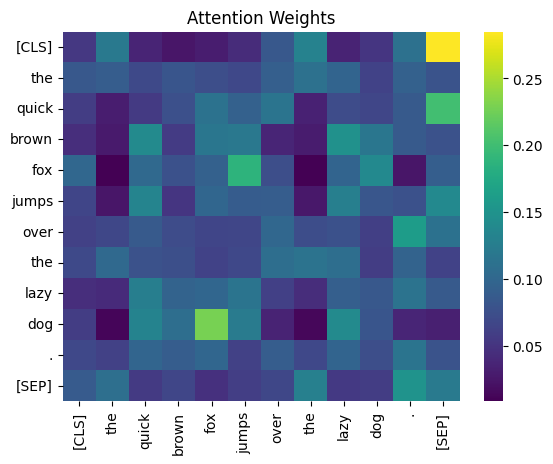

In [8]:
import seaborn as sns

attention = outputs.attentions
attention_matrix = attention[0][0][0].detach().numpy()

sns.heatmap(attention_matrix, xticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
            yticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]), cmap="viridis")
plt.title("Attention Weights")
plt.show()

The attention weights show that the words fox and dog have higher weights than the others, which shows the BERT model paying attention to these words and considering them as the main subject in the sentences.

The Transformers are based on a multi-head mechanism, so we will visualize all 12 heads from the first layer. As a reminder, the BERT structure [contains 12 layers with 12 heads](https://huggingface.co/google-bert/bert-base-uncased/blob/main/config.json) in each layer for their multi-head mechanism.

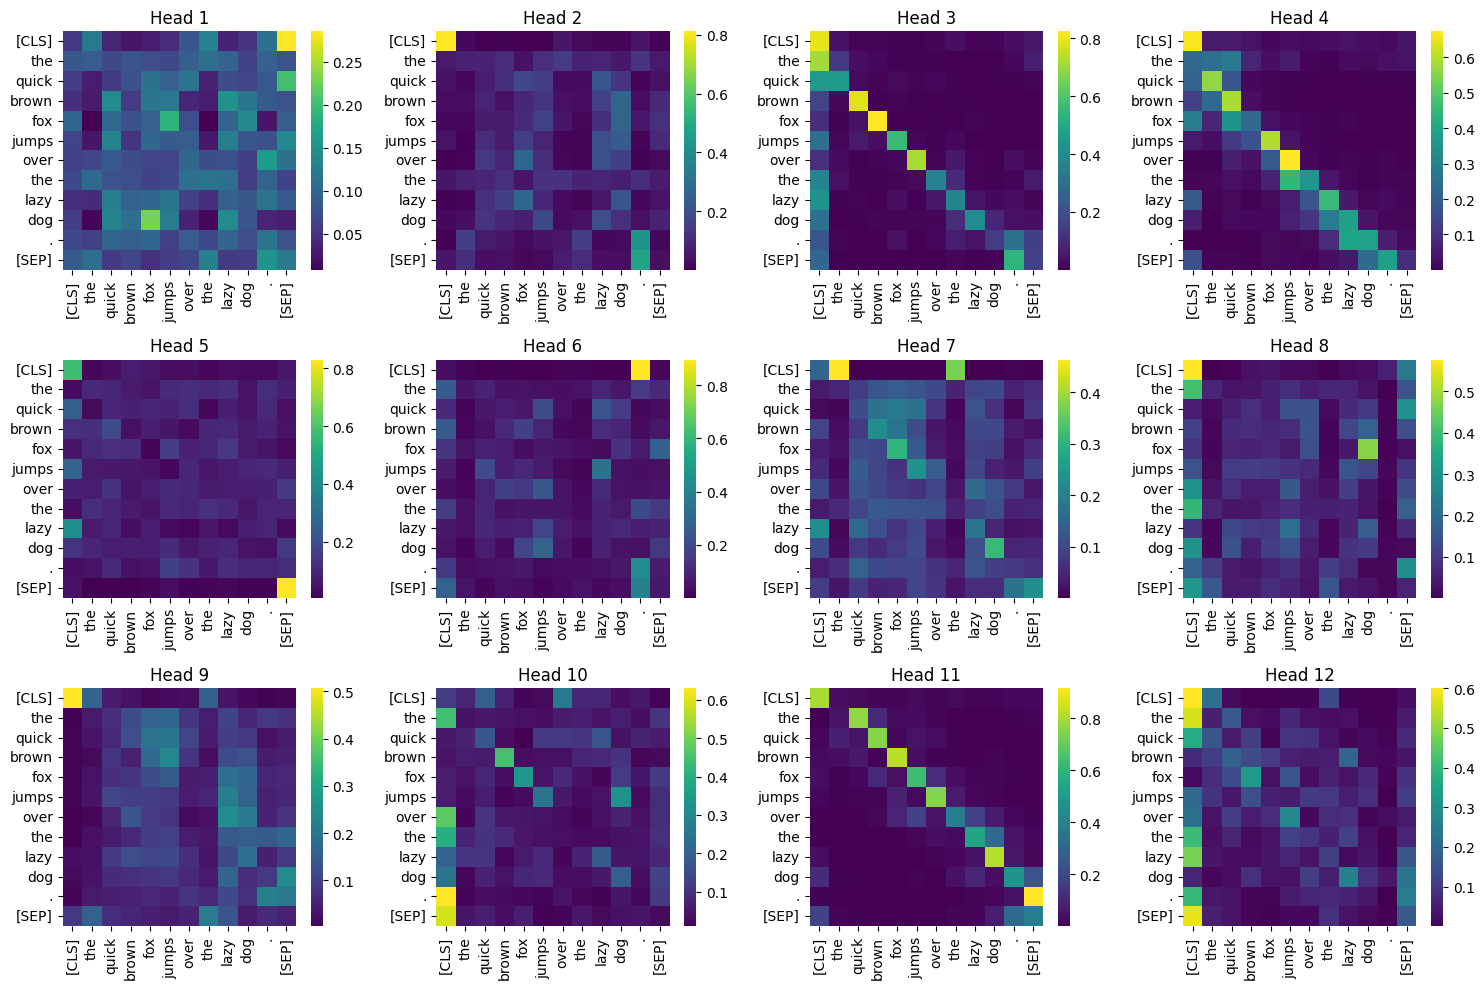

In [10]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    sns.heatmap(attention[0][0][i].detach().numpy(), ax=ax, cmap="viridis",
                xticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),
                yticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))
    ax.set_title(f"Head {i+1}")
plt.tight_layout()
plt.show()